# k-means clustering in $d$ dimensions

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a $d$-dimensional real vector, k-means clustering aims to partition the n observations into $k$ sets $(k ≤ n)$, $S = {S_1, S_2, …, S_k}\;$ so as to minimize the within-cluster sum of squares (WCSS):

$$\text{arg min} \; \sum_{i=1}^{k} \; \sum_{x_j \in S_i} \; \left|| x_j -  μ_i \right||$$

where $μ_i$ is the mean of points in $S_i$.

See [wikipedia](http://en.wikipedia.org/wiki/K-means_clustering) for a complete explaination.

This notebook shows a simple example using k-means clustering to determine the centre of point clouds in a 2D space.

### Set up the environment

In [19]:
from llib import coordinates
from llib import colours

### Build the point clouds

Set up *nclusters* of points at random coordinates.  Each cluster of *size* has *npoints* normally distributed about the centre.

In [36]:
nclusters = 8
npoints = 500
stop_diff = 1
size = 1000
clusters = coordinates.random(0, size, nclusters, 2)
data = []
for cluster in clusters:
    points = coordinates.random_cluster(cluster, size*0.1, npoints)
    data.extend(points)

Show the cluster centres (red) and the points (gray):

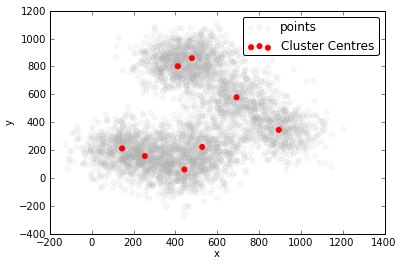

In [37]:
scatter(*coordinates.to_xy(data), color="0.7", label="points", alpha='0.1')
scatter(*coordinates.to_xy(clusters), color='r', label="Cluster Centres")
legend(loc='upper right', fancybox=True)
xlabel('x')
ylabel('y')

Seed the k-means algorithm with *k* initial, random, guesses for the cluster centres.

In [38]:
k = 8
centroids = coordinates.random(*coordinates.extents(data), 
    size=k, dim=len(coordinates.to_xy(clusters)))

Show the cluster centres (red), cluster points (gray) and the inital centroid guesses (black, crosses).

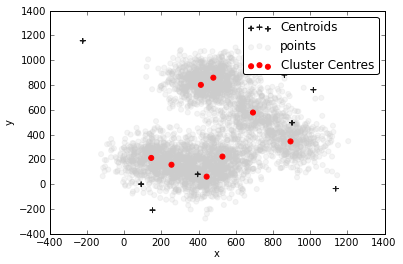

In [39]:
scatter(*coordinates.to_xy(data), color="0.8", label="points", alpha='0.2')
scatter(*coordinates.to_xy(clusters), color='r', label="Cluster Centres")
scatter(*coordinates.to_xy(centroids), marker='+', color='0.1', label="Centroids")
legend(loc="best", fancybox=True)
xlabel('x')
ylabel('y')

Now define the k-means algorithm, looking for *k* clusters in points *data*.  The algorithm starts from initial guess *centroids* and stops when the centroids move less than *stop\_diff* between iterations.

In [40]:
def k_means (k, data, centroids, stop_diff):
    centroid_paths = [[c] for c in centroids]
    max_diffs = []
    errors = []
    while True:
        regions = [[] for i in range(k)]
        for point in data:
            distances = [coordinates.distance(point, centroid) 
                for centroid in centroids]
            regions[argmin(distances)].append(point)

        diffs = []
        for i, region in enumerate(regions):
            if len(region) == 0:
                region.append(data[random_integers(0, len(data), 1)])
            centroid = coordinates.mean(region)
            diffs.append(coordinates.distance(centroid, centroids[i]))
            centroids[i] = centroid
            centroid_paths[i].append(centroid)
            max_diffs.append(sum(diffs))

        for centroid in centroids:
            errors.append(
                mean([
                 min([coordinates.distance(centroid, cluster) 
                    for cluster in clusters])
                 for centroid in centroids]))
        if max(diffs) < stop_diff:
            break
    return centroids, regions, errors, centroid_paths

Execute the *k-means* function and capture the results.  The function returns the final *centroids*, *k* clusters of points, *error* vectors and *centroid* positions at each iteration.

In [41]:
centroids, regions, errors, paths = k_means(k, data, centroids, stop_diff)

Generate a random colour palette, and plot the points, generated centroids, and correct cluster centres.  Points are coloured by region.

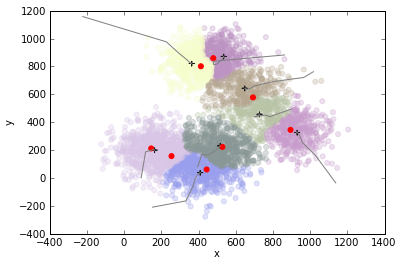

In [42]:
k_colors = colours.light_palette(k)

for i, region in enumerate(regions):
    scatter(*coordinates.to_xy(region), 
           color=k_colors[i], label="Region %d" % i, alpha='0.3')
scatter(*coordinates.to_xy(centroids), marker='+', color='0.1', label="Centroids")
scatter(*coordinates.to_xy(clusters), color='r', label="Cluster Centres")
for i, path in enumerate(paths):
    plot(*coordinates.to_xy(path), color='0.5')
#legend(loc='best', fancybox=True)
xlabel('x')
ylabel('y')

Finally, plot the error between *centroids* and the known *cluster centres* for each iteration of the *k-mean* loop.

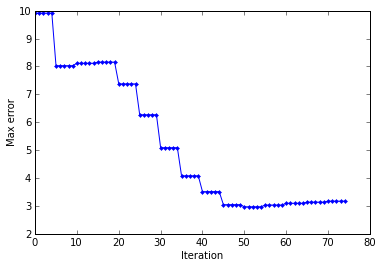

In [27]:
plot(errors, '.-')
xlabel('Iteration')
ylabel('Max error')